# Test ROC Analysis - Classification Binaire

Ce notebook teste la fonction `roc_analysis_binary` avec différents modèles de classification binaire.

In [1]:
# Import des modules nécessaires
import sys
import os

root_dir = os.getcwd().split("AdversarialNIDS")[0] + "AdversarialNIDS"
sys.path.append(root_dir)
os.chdir(root_dir)

import numpy as np
import matplotlib.pyplot as plt

from CICIDS2017.dataset import CICIDS2017
from UNSWNB15.dataset import UNSWNB15

from scripts.models.decision_tree.decision_tree import train_decision_tree
from scripts.models.random_forest.random_forest import train_random_forest

from scripts.analysis.roc_analysis import roc_analysis_binary
from scripts.logger import LoggerManager

## Configuration et chargement des données

In [2]:
# Configuration du logger
logger_mgr = LoggerManager(root_dir='logs', log_name='test_roc')
logger = logger_mgr.get_logger()

# Paramètres de test
dataset_choice = "CICIDS2017"  # ou "UNSWNB15"
ds_train_size = 50000  # Taille du dataset pour les tests
binary_classification = True  # IMPORTANT: Classification binaire

logger.info(f"Test ROC Analysis avec {dataset_choice}")

2025-11-27 02:31:32,048 - INFO - Test ROC Analysis avec CICIDS2017


In [3]:
# Chargement et préparation du dataset
if dataset_choice == "CICIDS2017":
    logger.info("Loading CICIDS2017 dataset...")
    ds = CICIDS2017(logger=logger).optimize_memory().encode()
    ds = ds.subset(size=ds_train_size, multi_class=not binary_classification)
else:
    logger.info("Loading UNSWNB15 dataset...")
    ds = UNSWNB15(dataset_size="small", logger=logger).optimize_memory().encode()
    ds = ds.subset(size=ds_train_size, multi_class=not binary_classification)

# Split des données
X_train, X_test, y_train, y_test = ds.split(test_size=0.2, apply_smote=True)

2025-11-27 02:31:35,750 - INFO - Loading CICIDS2017 dataset...
2025-11-27 02:31:35,751 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-27 02:31:36,242 - INFO - Loading dataset into DataFrame
2025-11-27 02:31:49,313 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-27 02:32:03,438 - INFO - ============================================================
2025-11-27 02:32:03,439 - INFO - Preprocessing completed successfully
2025-11-27 02:32:03,440 - INFO - Final dimensions: 1,940,693 rows x 71 columns
2025-11-27 02:32:03,440 - INFO - Total rows removed: 273,776 (12.36%)
2025-11-27 02:32:03,441 - INFO - data retention rate: 87.64%
2025-11-27 02:32:03,442 - INFO - ============================================================
2025-11-27 02:32:03,443 - INFO - Optimizing memory usage of the dataset...
2025-11-27 02:32:03,445 - INFO - Initial memory usage: 1066.05 MB
2025-11-27 02:32:04,103 - INFO - Optimized memory usage: 555.24 MB
2025-11-2

## Test 1: Decision Tree + ROC Analysis

2025-11-27 02:33:20,032 - INFO - Testing Decision Tree with ROC Analysis...
2025-11-27 02:33:20,033 - INFO - Performing Decision Tree cross-validation...
2025-11-27 02:33:25,303 - INFO - Training Decision Tree on full training set...
2025-11-27 02:33:26,346 - INFO - ==================================================
2025-11-27 02:33:26,347 - INFO - DECISION TREE MODEL
2025-11-27 02:33:26,348 - INFO - ==================================================
2025-11-27 02:33:26,349 - INFO - Parameters: max_depth=15, criterion=gini, min_samples_split=10, min_samples_leaf=5
2025-11-27 02:33:26,350 - INFO - Cross-validation scores: [0.99575  0.996625 0.996375 0.996875 0.996625]
2025-11-27 02:33:26,351 - INFO - Mean CV score: 0.9964 (+/- 0.0004)
2025-11-27 02:33:26,352 - INFO - Running ROC analysis for scikit-learn model: Decision Tree Binary
2025-11-27 02:33:26,355 - INFO - ROC AUC for Decision Tree Binary: 0.9982
2025-11-27 02:33:26,584 - INFO - ROC curve saved to: /home/loup/2A_TELECOM/Programm

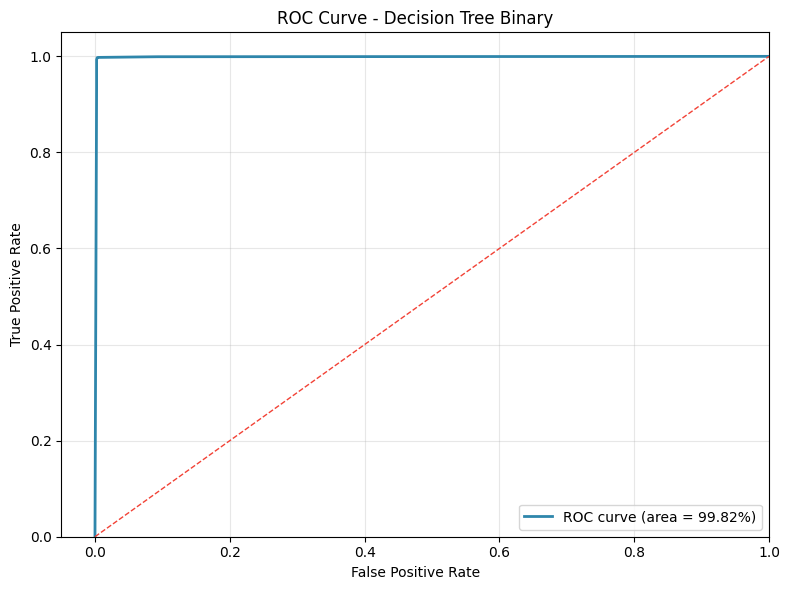

In [4]:
logger.info("Testing Decision Tree with ROC Analysis...")

# Entraînement du modèle
dt_model, dt_cv_scores = train_decision_tree(
    X_train, y_train, 
    max_depth=15,
    cv_test=True,
    logger=logger
)

# Test de la fonction ROC Analysis
fpr_dt, tpr_dt, auc_dt = roc_analysis_binary(
    model=dt_model,
    X_test=X_test,
    y_test=y_test,
    title="Decision Tree Binary",
    logger=logger,
    plot=True,
    save_fig=True
)

## Test 2: Random Forest + ROC Analysis

2025-11-27 02:33:31,980 - INFO - Testing Random Forest with ROC Analysis...
2025-11-27 02:33:31,981 - INFO - Performing Random Forest cross-validation...
2025-11-27 02:33:37,665 - INFO - Training Random Forest on full training set...
2025-11-27 02:33:38,378 - INFO - ==================================================
2025-11-27 02:33:38,378 - INFO - RANDOM FOREST MODEL
2025-11-27 02:33:38,379 - INFO - ==================================================
2025-11-27 02:33:38,379 - INFO - Parameters: n_estimators=50, max_depth=15, max_features=sqrt
2025-11-27 02:33:38,379 - INFO - Cross-validation scores: [0.998    0.997625 0.998    0.997625 0.99875 ]
2025-11-27 02:33:38,380 - INFO - Mean CV score: 0.9980 (+/- 0.0004)
2025-11-27 02:33:38,407 - INFO - Running ROC analysis for scikit-learn model: Random Forest Binary
2025-11-27 02:33:38,437 - INFO - ROC AUC for Random Forest Binary: 0.9999


✓ Random Forest entraîné - Accuracy: 0.999
🔄 Analyse ROC en cours...


2025-11-27 02:33:38,634 - INFO - ROC curve saved to: /home/loup/2A_TELECOM/Programmation/Projet_d_application/AdversarialNIDS/results/roc_analysis/Random_Forest_Binary_roc_analysis.png


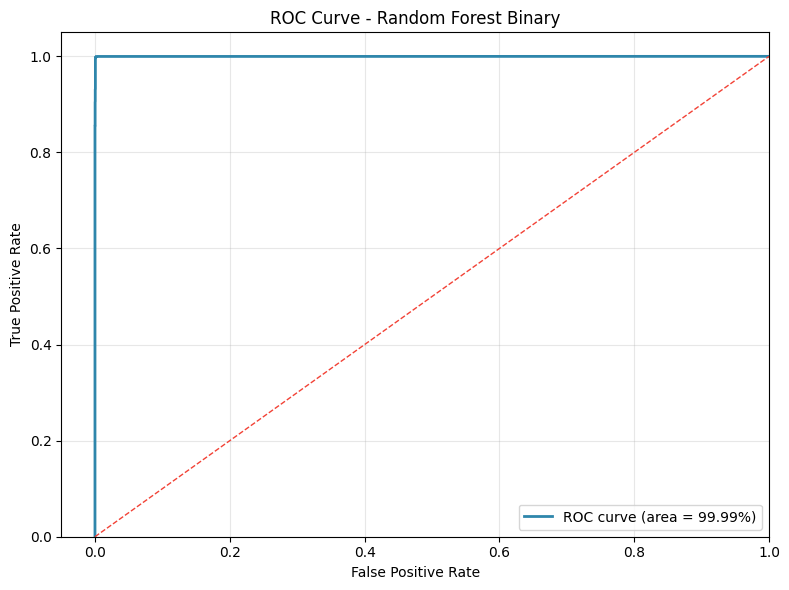

✓ ROC Analysis terminée - AUC: 0.9999


In [5]:
# Test 2: Random Forest
logger.info("Testing Random Forest with ROC Analysis...")

# Entraînement du modèle
rf_model, rf_cv_scores = train_random_forest(
    X_train, y_train,
    n_estimators=50,  # Réduit pour les tests
    max_depth=15,
    cv_test=True,
    logger=logger
)

# Évaluation des performances de base
rf_accuracy = rf_model.score(X_test, y_test)
print(f"✓ Random Forest entraîné - Accuracy: {rf_accuracy:.3f}")

# Test de la fonction ROC Analysis
print("🔄 Analyse ROC en cours...")
fpr_rf, tpr_rf, auc_rf = roc_analysis_binary(
    model=rf_model,
    X_test=X_test,
    y_test=y_test,
    title="Random Forest Binary",
    logger=logger,
    plot=True,
    save_fig=True
)

print(f"✓ ROC Analysis terminée - AUC: {auc_rf:.4f}")

## Test 3: Attaques adversariales + ROC Analysis

In [6]:
# Import des fonctions d'attaque
from NIDS_attacks.decision_tree_attack.hsj_attack_decision_tree import dt_hopskipjump_attack
from NIDS_attacks.random_forest_attack.hsj_attack_random_forest import rf_hopskipjump_attack

### 3.1 Attaque HopSkipJump sur Decision Tree

In [ ]:
print("🔄 Lancement attaque HopSkipJump sur Decision Tree...")
dt_attack_results = dt_hopskipjump_attack(
    dataset=dataset_choice,
    nb_samples=20,
    ds_train_size=20000,  # Dataset plus petit pour les tests
    is_multi_class=False,  # Binaire pour l'analyse ROC
    per_sample_visualization=False
)

2025-11-27 03:14:51,834 - INFO - Starting HopSkipJump attack on Decision Tree
2025-11-27 03:14:51,835 - INFO - Loading CICIDS2017 dataset...
2025-11-27 03:14:51,836 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-27 03:14:51,835 - INFO - Loading CICIDS2017 dataset...
2025-11-27 03:14:51,836 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset


🔄 Lancement attaque HopSkipJump sur Decision Tree...


2025-11-27 03:14:52,408 - INFO - Loading dataset into DataFrame
2025-11-27 03:15:04,532 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-27 03:15:04,532 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-27 03:15:18,383 - INFO - ============================================================
2025-11-27 03:15:18,384 - INFO - Preprocessing completed successfully
2025-11-27 03:15:18,384 - INFO - Final dimensions: 1,940,693 rows x 71 columns
2025-11-27 03:15:18,384 - INFO - Total rows removed: 273,776 (12.36%)
2025-11-27 03:15:18,385 - INFO - data retention rate: 87.64%
2025-11-27 03:15:18,385 - INFO - ============================================================
2025-11-27 03:15:18,385 - INFO - Optimizing memory usage of the dataset...
2025-11-27 03:15:18,388 - INFO - Initial memory usage: 1066.05 MB
2025-11-27 03:15:18,383 - INFO - ============================================================
2025-11-27 03:15:18,384 - INFO 

HopSkipJump:   0%|          | 0/200 [00:00<?, ?it/s]

2025-11-27 03:15:35,964 - INFO - === Attack Results ===
2025-11-27 03:15:35,965 - INFO - Original accuracy on attack samples: 1.000
2025-11-27 03:15:35,965 - INFO - Adversarial accuracy on attack samples: 0.000
2025-11-27 03:15:35,965 - INFO - Attack success rate (attacks -> benign): 1.000
2025-11-27 03:15:35,966 - INFO - Average L2 perturbation: 131.612728
2025-11-27 03:15:35,967 - INFO - 
Summary: Attack succeeded 100.0% of the time
2025-11-27 03:15:35,965 - INFO - Original accuracy on attack samples: 1.000
2025-11-27 03:15:35,965 - INFO - Adversarial accuracy on attack samples: 0.000
2025-11-27 03:15:35,965 - INFO - Attack success rate (attacks -> benign): 1.000
2025-11-27 03:15:35,966 - INFO - Average L2 perturbation: 131.612728
2025-11-27 03:15:35,967 - INFO - 
Summary: Attack succeeded 100.0% of the time


### 3.2 ROC Analysis après attaque Decision Tree

2025-11-27 03:15:48,525 - INFO - Running ROC analysis for scikit-learn model: Decision Tree - Échantillons Originaux
/home/loup/.local/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
2025-11-27 03:15:48,540 - INFO - ROC AUC for Decision Tree - Échantillons Originaux: nan
/home/loup/.local/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
2025-11-27 03:15:48,540 - INFO - ROC AUC for Decision Tree - Échantillons Originaux: nan


🔄 ROC Analysis sur échantillons ORIGINAUX (avant attaque)...


2025-11-27 03:15:48,814 - INFO - ROC curve saved to: /home/loup/2A_TELECOM/Programmation/Projet_d_application/AdversarialNIDS/results/roc_analysis/Decision_Tree_-_Échantillons_Originaux_roc_analysis.png


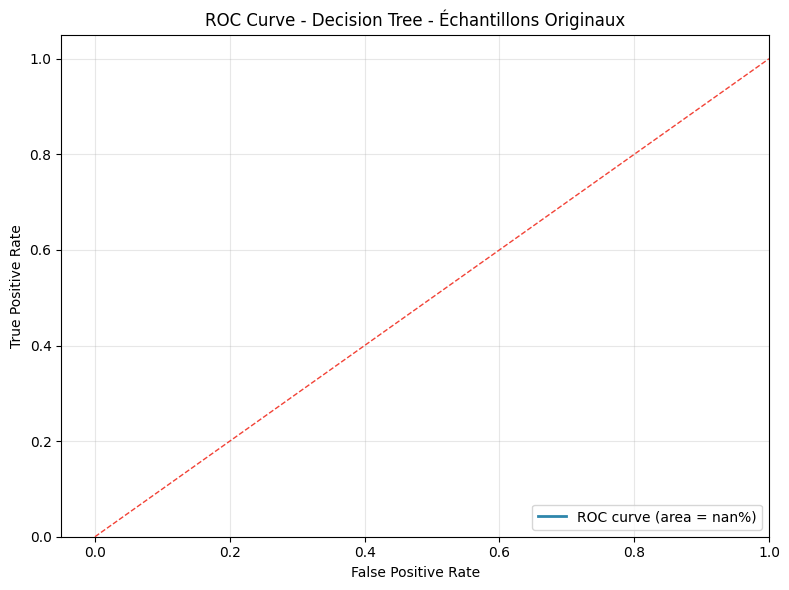

2025-11-27 03:15:48,892 - INFO - Running ROC analysis for scikit-learn model: Decision Tree - Échantillons Adverses
/home/loup/.local/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
2025-11-27 03:15:48,894 - INFO - ROC AUC for Decision Tree - Échantillons Adverses: nan
/home/loup/.local/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
2025-11-27 03:15:48,894 - INFO - ROC AUC for Decision Tree - Échantillons Adverses: nan


🔄 ROC Analysis sur échantillons ADVERSES (après attaque)...


2025-11-27 03:15:49,128 - INFO - ROC curve saved to: /home/loup/2A_TELECOM/Programmation/Projet_d_application/AdversarialNIDS/results/roc_analysis/Decision_Tree_-_Échantillons_Adverses_roc_analysis.png


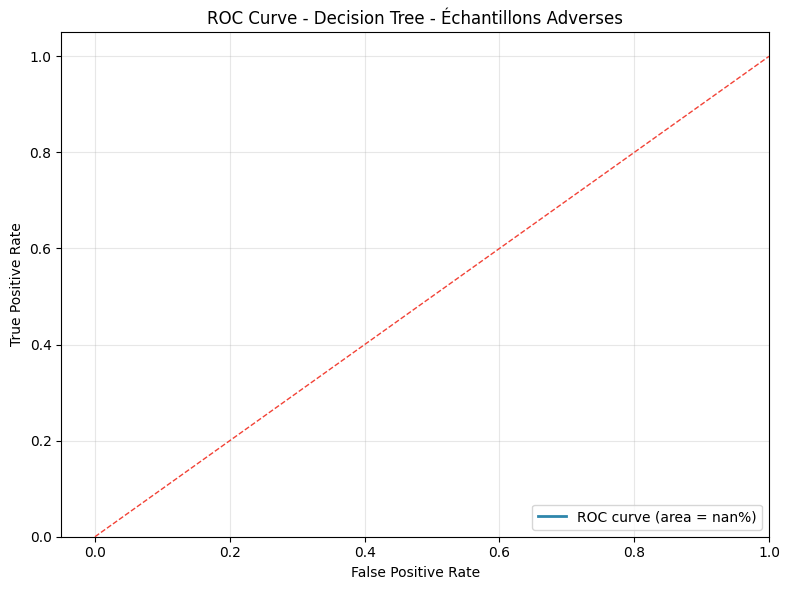

In [17]:
if dt_attack_results is not None:
    # Extraire les données d'attaque Decision Tree
    X_test_dt = dt_attack_results['X_test'] 
    y_test_dt = dt_attack_results['y_test']
    X_adv_dt = dt_attack_results['X_adv']
    model_dt = dt_attack_results['model']
    y_attacks = dt_attack_results['y_attacks']
    attack_indices = dt_attack_results['attack_indices']
    
    # Récupérer uniquement les échantillons qui ont été attaqués
    X_original_attacked = X_test_dt[attack_indices][:len(X_adv_dt)]
    y_original_attacked = y_attacks
    
    print("🔄 ROC Analysis sur échantillons ORIGINAUX (avant attaque)...")
    fpr_dt_orig, tpr_dt_orig, auc_dt_orig = roc_analysis_binary(
        model=model_dt,
        X_test=X_original_attacked,  # Seulement les échantillons originaux qui ont été attaqués
        y_test=y_original_attacked,
        title="Decision Tree - Échantillons Originaux",
        logger=logger,
        plot=True,
        save_fig=True
    )
    
    print("🔄 ROC Analysis sur échantillons ADVERSES (après attaque)...")
    fpr_dt_adv, tpr_dt_adv, auc_dt_adv = roc_analysis_binary(
        model=model_dt,
        X_test=X_adv_dt,  # Échantillons adverses générés
        y_test=y_original_attacked,  # Mêmes labels de référence
        title="Decision Tree - Échantillons Adverses",
        logger=logger,
        plot=True,
        save_fig=True
    )
    
    # Comparaison des prédictions sur les échantillons affectés

else:
    print("⚠️  Pas de données d'attaque Decision Tree disponibles")

### 3.3 Attaque HopSkipJump sur Random Forest

In [ ]:
# Attaque Random Forest 
print("🔄 Lancement attaque HopSkipJump sur Random Forest...")
rf_attack_results = rf_hopskipjump_attack(
    dataset=dataset_choice,
    nb_samples=15,
    ds_train_size=15000,  # Dataset plus petit pour les tests
    per_sample_visualization=False
)

if rf_attack_results is not None:
    print(f"✅ Attaque Random Forest terminée:")
    print(f"  - Taux de réussite: {rf_attack_results['attack_success_rate']:.1%}")
    print(f"  - Perturbation L2: {rf_attack_results['perturbation_l2']:.6f}")
else:
    print("❌ Échec de l'attaque Random Forest")

### 3.4 ROC Analysis après attaque Random Forest

In [ ]:
if rf_attack_results is not None:
    # Extraire les données d'attaque Random Forest
    X_test_rf = rf_attack_results['X_test'] 
    y_test_rf = rf_attack_results['y_test']
    X_adv_rf = rf_attack_results['X_adv']
    model_rf = rf_attack_results['model']
    y_attacks_rf = rf_attack_results['y_attacks']
    attack_indices_rf = rf_attack_results['attack_indices']
    
    print(f"✅ Échantillons adverses générés: {len(X_adv_rf)}")
    print(f"🎯 Classes originales des échantillons attaqués: {np.unique(y_attacks_rf)}")
    
    # Convertir en classification binaire (0=bénin, 1=attaque)
    y_attacks_rf_binary = (y_attacks_rf > 0).astype(int)
    
    print("🔄 ROC Analysis Random Forest sur échantillons ORIGINAUX attaqués...")
    fpr_rf_orig, tpr_rf_orig, auc_rf_orig = roc_analysis_binary(
        model=model_rf,
        X_test=X_test_rf[attack_indices_rf][:len(X_adv_rf)],  # Échantillons originaux qui ont été attaqués
        y_test=y_attacks_rf_binary,  # Labels binaires des échantillons attaqués
        title="Random Forest - Échantillons Originaux",
        logger=logger,
        plot=True,
        save_fig=True
    )
    
    print("🔄 ROC Analysis Random Forest sur échantillons ADVERSES générés...")
    fpr_rf_adv, tpr_rf_adv, auc_rf_adv = roc_analysis_binary(
        model=model_rf,
        X_test=X_adv_rf,  # Échantillons adverses
        y_test=y_attacks_rf_binary,  # Mêmes labels de référence
        title="Random Forest - Échantillons Adverses",
        logger=logger,
        plot=True,
        save_fig=True
    )
    
    # Comparaison directe des prédictions
    y_pred_orig_rf = model_rf.predict(X_test_rf[attack_indices_rf][:len(X_adv_rf)])
    y_pred_adv_rf = model_rf.predict(X_adv_rf)
    
    print(f"\\n📊 Analyse comparative Random Forest:")
    print(f"✅ AUC Échantillons originaux: {auc_rf_orig:.4f}")
    print(f"📉 AUC Échantillons adverses: {auc_rf_adv:.4f}")
    print(f"🔻 Dégradation AUC: {(auc_rf_orig - auc_rf_adv):.4f} ({((auc_rf_orig - auc_rf_adv)/auc_rf_orig*100):.1f}%)")
    print(f"🎯 Taux de réussite attaque: {rf_attack_results['attack_success_rate']:.1%}")
    print(f"🔍 Prédictions originales: {np.bincount(y_pred_orig_rf)}")
    print(f"🔍 Prédictions adverses: {np.bincount(y_pred_adv_rf)}")
else:
    print("⚠️  Pas de données d'attaque Random Forest disponibles")